# 1.Cold storage started its operation in January 2016. They are in the business of storing Pasteurized Fresh Whole or Skimmed Milk, Sweet Cream, Flavoured Milk Drinks. To ensure that there is no change of texture, body appearance, separation of fats, the optimal temperature to be maintained is between 2ᵒ - 4ᵒ degree C.
# In the first year of business they outsourced the plant maintenance work to a professional company with stiff penalty clauses. It was agreed that if it was statistically proven that probability of temperature going outside the 2ᵒ - 4ᵒ C during the one-year contract was above 2.5% and less than 5% then the penalty would be 10% of AMC. In case it exceeds 5% then the penalty would be 25% of AMC fees. The average temperature data at date level is given in the file ‘Cold_Storage_Temp_Data.csv’. 

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import scipy.stats as stats

In [67]:
data= pd.read_csv('Cold_Storage_Temp_Data.csv')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 4 columns):
Season          365 non-null object
Month           365 non-null object
Date            365 non-null int64
Temperature     365 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 11.5+ KB


In [69]:
data.describe()

,Date,Temperature
count,365.000000,365.000000
mean,15.720548,3.002466
std,8.808321,0.465832
min,1.000000,1.700000
25%,8.000000,2.700000
50%,16.000000,3.000000
75%,23.000000,3.300000
max,31.000000,4.500000


In [24]:
data.shape

(365, 4)

In [39]:
data.head()

,Season,Month,Date,Temperature
0,Winter,Jan,1,2.3
1,Winter,Jan,2,2.2
2,Winter,Jan,3,2.4
3,Winter,Jan,4,2.8
4,Winter,Jan,5,2.5


In [9]:
data.isnull().sum()

Season          0
Month           0
Date            0
Temperature     0
dtype: int64

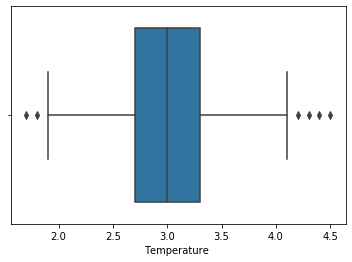

In [85]:
sns.boxplot(data['Temperature '])
plt.savefig('outlier_prob1.jpg')

(array([ 3., 12., 46., 76., 64., 88., 43., 23.,  7.,  3.]),
 array([1.7 , 1.98, 2.26, 2.54, 2.82, 3.1 , 3.38, 3.66, 3.94, 4.22, 4.5 ]),
 <a list of 10 Patch objects>)

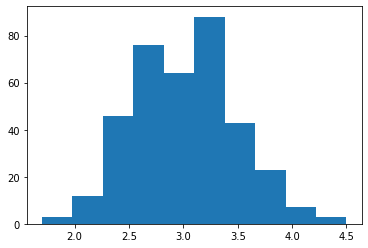

In [13]:
plt.hist(data['Temperature '])

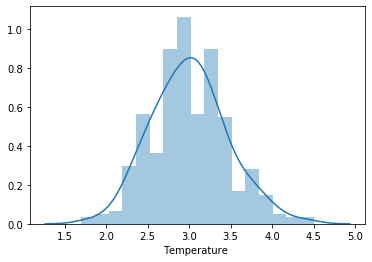

In [66]:
sns.distplot(data['Temperature '])

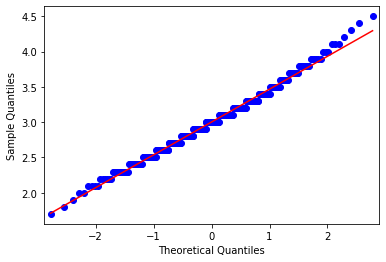

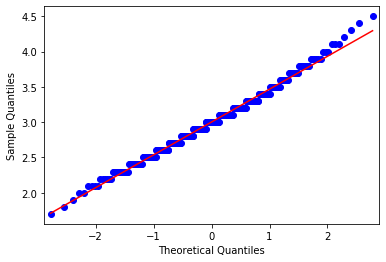

In [15]:
from statsmodels.graphics.gofplots import qqplot
qqplot(data['Temperature '], line = 's')

In [17]:
from scipy.stats import shapiro
stat, p = shapiro(data['Temperature '])
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=0.992, p=0.050


# (a) Find mean cold storage temperature for summer, winter and rainy season.

In [78]:
data['Season'].unique()

array(['Winter', 'Summer', 'Rainy'], dtype=object)

In [68]:
season_temp = data.groupby('Season')['Temperature '].mean()
season_temp

Season
Rainy     3.087705
Summer    3.147500
Winter    2.776423
Name: Temperature , dtype: float64

# (b) Find overall mean for the full year.

In [79]:
data['Temperature '].mean()

3.0024657534246546

# (c) Find standard deviation for the full year.

In [80]:
data['Temperature '].std()

0.4658319416510761

# (d) Assume normal distribution, what is the probability of temperature having fallen below 2ᵒ C?

In [29]:
#We have seen from shapiro test and qq plot that temerature is almost normally distributed. Also we are given in the question to assume a normal distribution
p1= stats.norm.cdf(2,loc=3.002,scale=0.465)
p1

0.015587228958846788

# (e) Assume normal distribution, what is the probability of temperature having fallen gone above 4ᵒ C?

In [28]:
#Again assuming a normal distribution
p2 = 1 - stats.norm.cdf(4,loc=3.002,scale=0.465)
p2

0.015927055086573216

# (f) What will be the penalty for the AMC Company?

In [32]:
# probability of temperature between 2 degree to 4 degrees celcius
p = p1 + p2
p

0.031514284045420005

In [ ]:
# Since probability of temperature going outside the 2ᵒ-4ᵒ C during the one-year contract was statistically proven to be above 2.5% and less than 5%, 3.15%, the penalty would be 10% of AMC

# In march 2018, Cold storage started getting complaints from their clients that they have been getting complaints from end consumers of the dairy products going sour and often smelling. On getting these complaints the supervisor pills out data of last 35 days temperature. As a safety measure the supervisor has been vigilant to maintain the temperature below 3.9ᵒ C. 
# Assume 3.9ᵒ C as upper acceptable temperature range and at alpha = 0.1 do you feel that there is a need for some corrective action in the cold storage plant or is it that the problem is from procurement side from where cold storage is getting dairy products.
# The data of the last 35 days is in Old_Storage_Mar2018.csv.

In [51]:
df = pd.read_csv('Cold_Storage_Mar2018.csv')

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 4 columns):
Season           35 non-null object
Month            35 non-null object
Date             35 non-null int64
 Temperature     35 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 1.2+ KB


In [62]:
df.describe()

,Date,Temperature
count,35.000000,35.000000
mean,14.400000,3.974286
std,7.389181,0.159674
min,1.000000,3.800000
25%,9.500000,3.900000
50%,14.000000,3.900000
75%,19.500000,4.100000
max,28.000000,4.600000


In [57]:
df.shape

(35, 4)

In [56]:
df.head()

,Season,Month,Date,Temperature
0,Summer,Feb,11,4.0
1,Summer,Feb,12,3.9
2,Summer,Feb,13,3.9
3,Summer,Feb,14,4.0
4,Summer,Feb,15,3.8


In [58]:
df.isnull().sum()

Season           0
Month            0
Date             0
 Temperature     0
dtype: int64

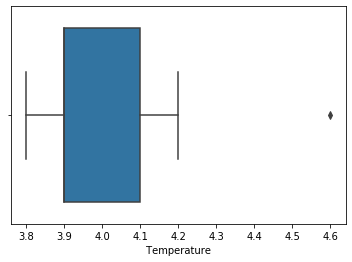

In [84]:
sns.boxplot(df[' Temperature '])
plt.savefig('outlier_prob2.jpg')

# (a) Which hypothesis test shall be performed to check that if corrective action Is needed at the cold storage plant? Justify your answer.

In [ ]:
#since we don't have the population standard deviation, we will perform a Single Sample T-test on the temperature data.

# (b) State that hypothesis and do the necessary calculations to accept or reject the corresponding null hypothesis.

In [ ]:
# H0 = the problem is not at the plant, i.e. µ = 3.9
# H1 = the problem is at the plant and it needs some corrective measure, i.e µ ≠ 3.9

In [64]:
# We have sample mean and standard deviation of temperature column from the descibe() function earlier.
# sample mean = 3.97428 & sample standard deviation = 0.15967
from scipy.stats import ttest_1samp
t_statistic, p_value = ttest_1samp(df[' Temperature '], 3.9)
print(t_statistic,p_value)

2.752358609800241 0.009422395404264431


# (c) Give your inference.

In [ ]:
# from the one sample T test we can see that our P-value is 0.009. Since this p-value is less than our given alpha value(0.1), we can reject the null hypothesis.
# We can conclude with 90% confidence that the problem persists at the plant and it needs some corrective measure.